<a href="https://colab.research.google.com/github/batul-hussain/zee_recommender_engine/blob/main/Zee_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement :
Build Recommender Engine using 
Collaborative Filtering (Item-based & User-based Approach),
Pearson Correlation,
Nearest Neighbors using Cosine Similarity,
Matrix Factorization


In [ ]:
import pandas as pd
import numpy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **READING DATA**

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/scaler case study/Zee Recommender System/zee-movies.dat', sep = '::', engine = 'python',encoding='ISO-8859-1')
ratings = pd.read_csv('/content/drive/MyDrive/scaler case study/Zee Recommender System/zee-ratings.dat', sep = '::', engine = 'python',encoding='ISO-8859-1')
users = pd.read_csv('/content/drive/MyDrive/scaler case study/Zee Recommender System/zee-users.dat', sep = '::', engine = 'python',encoding='ISO-8859-1')

# **MOVIES TABLE EDA**

In [ ]:
movies.head(2)

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [ ]:
#Creating new column - RELEASE YEAR
movies["release_year"] = movies.Title.str.extract(r'\((\d+)\)',expand=True)
movies["release_year"].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

In [ ]:
movies['release_year'].isnull().value_counts()
#There are no null values in released year column

False    3883
Name: release_year, dtype: int64

In [ ]:
#Checking for Duplicate Rows
movies.duplicated().value_counts()

False    3883
dtype: int64

In [ ]:
a = movies["Genres"].apply( lambda x : str(x).split("|")).tolist()
df_movies = pd.DataFrame(a,index=movies["Genres"]).stack().reset_index()
df_movies.rename(columns={0:"genres"},inplace=True)
df_movies.drop("level_1",inplace=True,axis=1)


In [ ]:
df_movies = pd.merge(movies,df_movies,left_on = "Genres",right_on = "Genres",how="inner").drop_duplicates()

In [ ]:
df_movies.head()

,Movie ID,Title,Genres,release_year,genres
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
2,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
30,1064,Aladdin and the King of Thieves (1996),Animation|Children's|Comedy,1996,Animation
31,1064,Aladdin and the King of Thieves (1996),Animation|Children's|Comedy,1996,Children's


<function matplotlib.pyplot.show(close=None, block=None)>

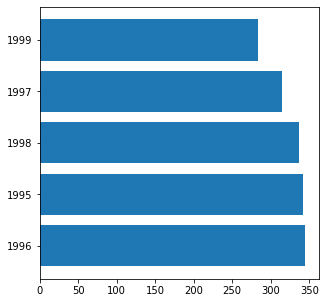

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(movies["release_year"].value_counts()[:5].index,movies["release_year"].value_counts()[:5])
plt.show

[Text(0, 0, 'Animation'),
 Text(1, 0, "Children's"),
 Text(2, 0, 'Comedy'),
 Text(3, 0, 'Adventure'),
 Text(4, 0, 'Fantasy'),
 Text(5, 0, 'Romance'),
 Text(6, 0, 'Drama'),
 Text(7, 0, 'Action'),
 Text(8, 0, 'Crime'),
 Text(9, 0, 'Thriller'),
 Text(10, 0, 'Horror'),
 Text(11, 0, 'Sci-Fi'),
 Text(12, 0, 'Documentary'),
 Text(13, 0, 'War'),
 Text(14, 0, 'Musical'),
 Text(15, 0, 'Mystery'),
 Text(16, 0, 'Film-Noir'),
 Text(17, 0, 'Western')]

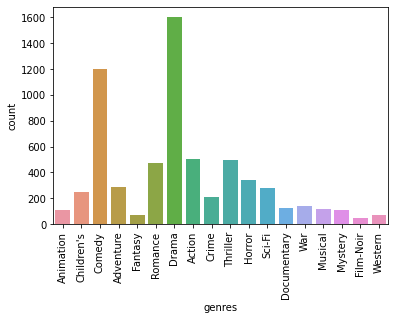

In [ ]:
g = sns.countplot(x=df_movies["genres"])
g.set_xticklabels(g.get_xticklabels(), rotation=90)


In [ ]:
pd.crosstab(df_movies["genres"],df_movies["release_year"])

release_year,1919,1920,1921,1922,1923,1925,1926,1927,1928,1929,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
genres,,,,,,,,,,,,,,,,,,,,,
Action,1,0,1,0,0,0,0,0,0,0,...,6,21,25,32,45,37,43,44,27,19
Adventure,1,0,0,0,0,0,1,0,0,0,...,4,3,10,15,25,22,22,16,7,6
Animation,0,0,0,0,0,0,0,0,0,0,...,2,3,4,5,8,7,6,8,7,8
Children's,0,0,0,0,0,0,0,0,0,0,...,3,7,12,20,22,20,22,18,11,9
Comedy,1,2,0,0,2,3,1,2,3,0,...,24,37,47,96,89,115,98,112,103,69
Crime,0,0,0,0,0,0,1,0,0,0,...,1,10,8,9,18,23,26,25,12,8
Documentary,0,0,0,0,0,0,0,0,0,0,...,1,1,5,11,22,19,11,18,15,8
Drama,2,0,0,1,1,3,4,4,0,1,...,26,38,81,121,158,150,139,166,130,55
Fantasy,0,0,0,0,0,0,0,0,0,0,...,3,1,3,5,4,5,6,2,2,1


# **RATINGS TABLE EDA**

In [ ]:
ratings.head(2)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [ ]:
#Checking for Duplicate Rows
ratings.duplicated().value_counts()

False    1000209
dtype: int64

In [ ]:
import datetime

def convert_to_preferred_format(sec):
   sec = sec % (24 * 3600)
   hour = sec // 3600
   sec %= 3600
   min = sec // 60
   sec %= 60
   return "%02d:%02d:%02d" % (hour, min, sec) 

ratings["time"]=ratings.Timestamp.apply(convert_to_preferred_format)

In [ ]:
ratings["time"]=pd.to_datetime(ratings["time"])

In [ ]:
ratings["rating_year"] = ratings["time"].dt.year
ratings["rating_month"] = ratings["time"].dt.month

In [ ]:
print('The ratings dataset has', ratings['UserID'].nunique(), 'unique users')
print('The ratings dataset has', ratings['MovieID'].nunique(), 'unique movies')
print('The ratings dataset has', ratings['Rating'].nunique(), 'unique ratings')
print('The unique ratings are', sorted(ratings['Rating'].unique()))
print('Rating Year',ratings["rating_year"].unique())
print('Rating Month',ratings["rating_month"].unique())

The ratings dataset has 6040 unique users
The ratings dataset has 3706 unique movies
The ratings dataset has 5 unique ratings
The unique ratings are [1, 2, 3, 4, 5]
Rating Year [2023]
Rating Month [3]


<BarContainer object of 5 artists>

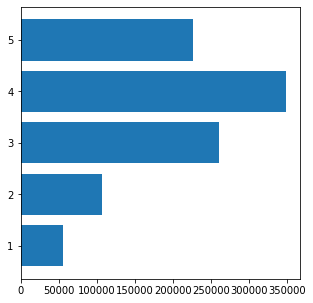

In [ ]:
plt.figure(figsize=(5,5))
plt.barh(ratings["Rating"].value_counts()[:5].index,ratings["Rating"].value_counts()[:5])

# **USERS TABLE EDA**

In [ ]:
users.head(2)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [ ]:
#Checking for Duplicate Rows
users.duplicated().value_counts()

False    6040
dtype: int64

In [ ]:
r = ratings.copy()
users = users.merge(r.groupby("UserID").Rating.mean().reset_index(),on = "UserID")

In [ ]:
users.replace({"Age":{1: "Under 18",18: "18-24",25: "25-34",35: "35-44",45: "45-49",50: "50-55",56: "56+"}},inplace=True)
users.replace({"Occupation":{0: "other",1: "academic/educator",2: "artist",
3: "clerical/admin",
4: "college/grad student",
5: "customer service",
6: "doctor/health care",
7: "executive/managerial",
8: "farmer",
9: "homemaker",
10: "K-12 student",
11: "lawyer",
12: "programmer",
13: "retired",
14: "sales/marketing",
15: "scientist",
16: "self-employed",
17: "technician/engineer",
18: "tradesman/craftsman",
19: "unemployed",
20: "writer"}},inplace=True)

In [ ]:
users.head(2)

,UserID,Gender,Age,Occupation,Zip-code,Rating
0,1,F,Under 18,K-12 student,48067,4.188679
1,2,M,56+,self-employed,70072,3.713178


<BarContainer object of 5 artists>

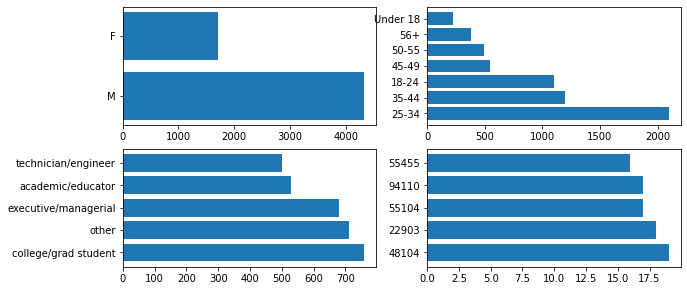

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(4, 2, 1)
plt.barh(users["Gender"].value_counts().index,users["Gender"].value_counts())
plt.subplot(4, 2, 2)
plt.barh(users["Age"].value_counts().index,users["Age"].value_counts())
plt.subplot(4, 2, 3)
plt.barh(users["Occupation"].value_counts()[:5].index,users["Occupation"].value_counts()[:5])
plt.subplot(4, 2, 4)
plt.barh(users["Zip-code"].value_counts()[:5].index,users["Zip-code"].value_counts()[:5])

In [ ]:
pd.crosstab(users["Gender"],users["Age"])

Age,18-24,25-34,35-44,45-49,50-55,56+,Under 18
Gender,,,,,,,
F,298,558,338,189,146,102,78
M,805,1538,855,361,350,278,144


In [ ]:
pd.crosstab(users["Age"],users["Occupation"])

Occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,other,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
Age,,,,,,,,,,,,,,,,,,,,,
18-24,29,45,44,18,534,18,9,17,1,6,...,106,59,0,37,14,18,52,10,30,49
25-34,1,156,113,68,200,52,76,253,6,29,...,298,181,0,133,73,58,202,23,15,108
35-44,1,118,47,42,14,25,59,214,3,35,...,135,86,5,70,25,58,132,16,9,68
45-49,0,80,30,17,3,10,31,74,1,11,...,66,32,7,26,17,38,57,9,2,22
50-55,0,70,18,16,5,6,40,80,2,7,...,46,22,27,19,8,45,35,9,2,23
56+,1,55,12,12,0,1,21,39,3,4,...,33,7,102,15,7,24,22,3,2,11
Under 18,163,4,3,0,3,0,0,2,1,0,...,27,1,1,2,0,0,2,0,12,0


In [ ]:
pd.crosstab(users["Gender"],users["Occupation"])

Occupation,K-12 student,academic/educator,artist,clerical/admin,college/grad student,customer service,doctor/health care,executive/managerial,farmer,homemaker,...,other,programmer,retired,sales/marketing,scientist,self-employed,technician/engineer,tradesman/craftsman,unemployed,writer
Gender,,,,,,,,,,,,,,,,,,,,,
F,66,209,91,100,234,31,102,139,3,89,...,232,50,34,79,28,51,52,4,15,78
M,129,319,176,73,525,81,134,540,14,3,...,479,338,108,223,116,190,450,66,57,203


***INFERENCE FROM MOVIE TABLE***
1. Most of the movies on platform were released in 1996, followed by 1995 and 1998
2. Drama and Comedy are the most popular genres on the platform
3. Least Popular genres are Mystry, film noir and western

***INFERENCE FROM RATINGS TABLE***
1. The ratings dataset has 6040 unique users
2. The ratings dataset has 3706 unique movies
3. The ratings dataset has 5 unique ratings
4. The unique ratings are [1, 2, 3, 4, 5] out of which most popular is 4
5. Data is available for Rating Year [2023] Rating Month [3]

***INFERENCE FROM USERS TABLE***
1. More data for Males is available than females
2. Age group 25-34 watches maximum movies and rates them as well
3. Mostly College/Graduate Students rates the movies
4. Most of the data is from Michigan, United States

# **Merging the Data Frames**

In [ ]:
df1 = pd.merge(movies,ratings,left_on = "Movie ID",right_on = "MovieID",how="inner" )

In [ ]:
df1.drop(columns=["Movie ID"],inplace=True)

In [ ]:
#aggregate by movie
agg_ratings = df1.groupby("Title").agg(mean_rating=("Rating","mean"),no_of_rating = ("Rating","count")).reset_index()

In [ ]:
#Check Popular Movies
agg_ratings.sort_values(by="no_of_rating",ascending = False).head()

,Title,mean_rating,no_of_rating
127,American Beauty (1999),4.317386,3428
3153,Star Wars: Episode IV - A New Hope (1977),4.453694,2991
3154,Star Wars: Episode V - The Empire Strikes Back...,4.292977,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
1789,Jurassic Park (1993),3.763847,2672


In [ ]:
table10 = pd.merge(agg_ratings,movies,left_on = "Title",right_on = "Title",how ="inner")
table11 = pd.merge(table10,df_movies,left_on = "Title",right_on ="Title",how = "inner")
table12 = pd.merge(table11,ratings,left_on = "Movie ID_x",right_on ="MovieID",how = "inner")
table13 = pd.merge(table12,users,left_on = "UserID",right_on = "UserID",how ="inner")

In [ ]:
table13.head(2)

,Title,mean_rating,no_of_rating,Movie ID_x,Genres_x,release_year_x,Movie ID_y,Genres_y,release_year_y,genres,...,Rating_x,Timestamp,time,rating_year,rating_month,Gender,Age,Occupation,Zip-code,Rating_y
0,"$1,000,000 Duck (1971)",3.027027,37,2031,Children's|Comedy,1971,2031,Children's|Comedy,1971,Children's,...,2,976867230,2023-03-23 08:00:30,2023,3,M,45-49,retired,52761,3.231738
1,"$1,000,000 Duck (1971)",3.027027,37,2031,Children's|Comedy,1971,2031,Children's|Comedy,1971,Comedy,...,2,976867230,2023-03-23 08:00:30,2023,3,M,45-49,retired,52761,3.231738


In [ ]:
table13.loc[table13["no_of_rating"]==3428]

,Title,mean_rating,no_of_rating,Movie ID_x,Genres_x,release_year_x,Movie ID_y,Genres_y,release_year_y,genres,...,Rating_x,Timestamp,time,rating_year,rating_month,Gender,Age,Occupation,Zip-code,Rating_y
72,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Comedy,...,4,976861272,2023-03-23 06:21:12,2023,3,M,45-49,retired,52761,3.231738
73,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Drama,...,4,976861272,2023-03-23 06:21:12,2023,3,M,45-49,retired,52761,3.231738
1937,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Comedy,...,5,975534191,2023-03-23 21:43:11,2023,3,M,18-24,college/grad student,76013,4.163507
1938,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Drama,...,5,975534191,2023-03-23 21:43:11,2023,3,M,18-24,college/grad student,76013,4.163507
2920,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Comedy,...,5,975276973,2023-03-23 22:16:13,2023,3,M,18-24,writer,92026,3.515439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075347,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Drama,...,4,957574269,2023-03-23 00:51:09,2023,3,M,35-44,sales/marketing,85331,4.134328
2075462,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Comedy,...,5,957533826,2023-03-23 13:37:06,2023,3,F,18-24,other,02138,3.346154
2075463,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Drama,...,5,957533826,2023-03-23 13:37:06,2023,3,F,18-24,other,02138,3.346154
2075505,American Beauty (1999),4.317386,3428,2858,Comedy|Drama,1999,2858,Comedy|Drama,1999,Comedy,...,4,956861064,2023-03-23 18:44:24,2023,3,F,25-34,writer,32301,4.080645


In [ ]:
#Users of which age group have watched and rated the most number of movies? 
table13.groupby(["Age"])["no_of_rating"].count()

Age
18-24       391839
25-34       831332
35-44       417534
45-49       173677
50-55       149791
56+          78822
Under 18     58820
Name: no_of_rating, dtype: int64

In [ ]:
#Users belonging to which profession have watched and rated the most movies?
table13.groupby(["Occupation"])["no_of_rating"].count()

Occupation
K-12 student             51139
academic/educator       175511
artist                  103077
clerical/admin           65049
college/grad student    277745
customer service         46229
doctor/health care       76589
executive/managerial    221078
farmer                    5965
homemaker                23799
lawyer                   42342
other                   271878
programmer              125215
retired                  27757
sales/marketing         104052
scientist                49455
self-employed            95285
technician/engineer     160668
tradesman/craftsman      25227
unemployed               30887
writer                  122868
Name: no_of_rating, dtype: int64

In [ ]:
table13.groupby(["Gender"])["no_of_rating"].count()

Gender
F     505937
M    1595878
Name: no_of_rating, dtype: int64

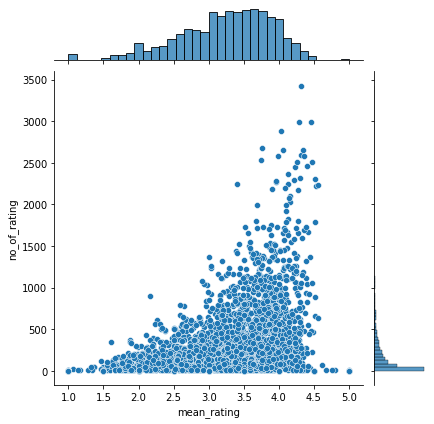

In [ ]:
#let’s use a jointplot to check the correlation between the average rating and the number of ratings.
sns.jointplot(x="mean_rating",y = "no_of_rating",data = agg_ratings)
#We can see an upward trend from the scatter plot, showing that popular movies get higher ratings

In [ ]:
df2 = pd.merge(df1,users,on = "UserID",how="inner")

In [ ]:
df2.head(2)

,Title,Genres,release_year,UserID,MovieID,Rating_x,Timestamp,time,rating_year,rating_month,Gender,Age,Occupation,Zip-code,Rating_y
0,Toy Story (1995),Animation|Children's|Comedy,1995,1,1,5,978824268,2023-03-23 23:37:48,2023,3,F,Under 18,K-12 student,48067,4.188679
1,Pocahontas (1995),Animation|Children's|Musical|Romance,1995,1,48,5,978824351,2023-03-23 23:39:11,2023,3,F,Under 18,K-12 student,48067,4.188679


In [ ]:
df_movies.head(2)

,Movie ID,Title,Genres,release_year,genres
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
1,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's


In [ ]:
major_df = df2.merge(df_movies,on = "Title",how="inner") 

In [ ]:
abc = major_df.groupby(["genres","Age"])["Title"].count()

In [ ]:
bcd = major_df.groupby(["genres","Occupation"])["Title"].count()

In [ ]:
abc.head(150)

genres   Age     
Action   18-24        50186
         25-34       105678
         35-44        50503
         45-49        19357
         50-55        17012
                      ...  
Western  35-44         4546
         45-49         2133
         50-55         2420
         56+           1333
         Under 18       335
Name: Title, Length: 126, dtype: int64

In [ ]:
bcd.head()

genres  Occupation          
Action  K-12 student             6067
        academic/educator       18673
        artist                  11277
        clerical/admin           7078
        college/grad student    35152
Name: Title, dtype: int64

In [ ]:
#Drop rows with NA Values in it. Since data size is huge, we can drop few rows
df2.dropna(inplace=True)

# **Build a Recommendation System based on Pearson Correlation**

In [ ]:
#Create User-Movie Matrix
table1 = df1.copy()
table1 = table1.pivot(index='Title', columns='UserID', values='Rating')
table1.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Data Normalization - we will normalize the data by subtracting the average rating of each movie
table1_norm = table1.subtract(table1.mean(axis=1),axis = 0)
table1_norm.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.371429,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.089109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Item similarity matrix using Pearson correlation
item_similarity = table1_norm.T.corr()
item_similarity.head()
#the values range from -1 to 1, where -1 means opposite movie similarity and 1 means very high movie similarity.

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000e+00,0.522233,NaN,5.410762e-17,0.422577,NaN,-0.449490,0.561074,0.150584,0.125209,...,1.000000,-0.106243,NaN,0.000000,NaN,-1.000000,0.000000,NaN,9.449112e-01,-0.500000
'Night Mother (1986),5.222330e-01,1.000000,-0.177705,2.400000e-01,0.216272,NaN,0.266158,0.220347,-0.199239,0.213733,...,0.774597,-0.276359,1.000000,-0.052758,NaN,-0.492518,0.082580,NaN,NaN,0.100372
'Til There Was You (1997),NaN,-0.177705,1.000000,7.126268e-01,0.719676,NaN,0.300273,0.457984,0.564288,0.210259,...,NaN,-0.016137,NaN,0.059235,NaN,NaN,0.183855,NaN,1.000000e+00,0.303731
"'burbs, The (1989)",5.410762e-17,0.240000,0.712627,1.000000e+00,0.089727,NaN,0.189689,0.088541,0.101064,0.047590,...,0.355654,0.278425,NaN,0.158997,NaN,0.080064,0.039503,NaN,-7.850462e-17,0.135172
...And Justice for All (1979),4.225771e-01,0.216272,0.719676,8.972749e-02,1.000000,NaN,0.291124,0.166965,-0.142597,0.303093,...,-0.279257,0.052517,0.310087,0.159503,NaN,-0.542037,0.200237,NaN,NaN,-0.024037


In [ ]:
# User similarity matrix using Pearson correlation
user_similarity = table1_norm.corr()
user_similarity.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.310987,-0.136561,0.018232,-0.179862,0.408871,-1.000000,-0.259994,0.496926,0.042888,...,0.051273,0.804029,1.000000,NaN,0.074566,-0.168965,-0.515688,NaN,0.078024,-0.152273
2,0.310987,1.000000,0.153592,-0.015989,-0.415402,-0.020123,-0.075283,-0.257643,0.016640,-0.146139,...,-0.684105,0.006638,0.220319,NaN,0.154326,0.159507,0.231192,-0.615640,0.564318,-0.216028
3,-0.136561,0.153592,1.000000,0.966032,-0.377145,0.700236,0.820080,-0.655496,0.168127,-0.079260,...,-0.463201,0.065453,-0.647260,NaN,0.267411,0.016615,-0.168177,0.605922,0.130528,-0.521347
4,0.018232,-0.015989,0.966032,1.000000,-0.077760,NaN,-0.416296,0.350789,0.251496,-0.405506,...,-0.804594,0.030172,-0.046286,NaN,-0.123483,0.350348,-0.314850,-1.000000,-0.622966,0.403517
5,-0.179862,-0.415402,-0.377145,-0.077760,1.000000,-0.256418,-0.110720,0.145416,-0.206160,-0.134768,...,0.186974,0.503987,0.122149,0.302185,0.471444,0.044170,-0.289917,-0.921633,1.000000,0.146872


In [ ]:
#Start Recommendation System
# Lets assume our user likes Liar Liar (1997). we have to give a list of movies that we think the user might like.
print(item_similarity['Liar Liar (1997)'].sort_values(ascending=False).iloc[:20])

Title
Liar Liar (1997)                                                                      1.0
Mina Tannenbaum (1994)                                                                1.0
Voyage of the Damned (1976)                                                           1.0
Sacco and Vanzetti (Sacco e Vanzetti) (1971)                                          1.0
Jupiter's Wife (1994)                                                                 1.0
Love Is the Devil (1998)                                                              1.0
Feast of July (1995)                                                                  1.0
Arguing the World (1996)                                                              1.0
Apple, The (Sib) (1998)                                                               1.0
Cabaret Balkan (Bure Baruta) (1998)                                                   1.0
Those Who Love Me Can Take the Train (Ceux qui m'aiment prendront le train) (1998)    1.0
Go N

# **Build a Recommender System based on Cosine Similarity**


**ITEM BASED**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
item_similarity_cosine = cosine_similarity(table1_norm.fillna(0))
item_similarity_cosine

array([[ 1.00000000e+00,  5.42579140e-03,  2.17657862e-04, ...,
         0.00000000e+00,  1.24227911e-02, -1.18931164e-02],
       [ 5.42579140e-03,  1.00000000e+00, -2.79203577e-02, ...,
         0.00000000e+00,  0.00000000e+00,  2.67289655e-03],
       [ 2.17657862e-04, -2.79203577e-02,  1.00000000e+00, ...,
         0.00000000e+00,  1.32486952e-02,  1.74438301e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  2.20691121e-02],
       [ 1.24227911e-02,  0.00000000e+00,  1.32486952e-02, ...,
         0.00000000e+00,  1.00000000e+00,  7.45065317e-03],
       [-1.18931164e-02,  2.67289655e-03,  1.74438301e-02, ...,
         2.20691121e-02,  7.45065317e-03,  1.00000000e+00]])

In [ ]:
recommender_df = pd.DataFrame(item_similarity_cosine, 
                                  columns=table1_norm.index,
                                  index=table1_norm.index)


In [ ]:
recommender_df.head(2)

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.005426,0.000218,0.000237,0.011534,0.0,-0.035030,0.106339,0.026127,-0.026918,...,0.008211,-0.013066,0.000000,-0.008771,0.0,-0.016180,0.002219,0.0,0.012423,-0.011893
'Night Mother (1986),0.005426,1.000000,-0.027920,0.016997,0.043916,0.0,0.017359,0.033991,-0.010504,0.023962,...,0.045371,-0.013403,-0.000164,-0.009447,0.0,-0.085133,0.005007,0.0,0.000000,0.002673


In [ ]:
#Start Recommendation System
# Lets assume our user likes 101 Dalmatians (1996). we have to give a list of movies that we think the user might like.
print(recommender_df['101 Dalmatians (1996)'].sort_values(ascending=False).iloc[:10])

Title
101 Dalmatians (1996)                         1.000000
Air Bud (1997)                                0.258551
All Dogs Go to Heaven 2 (1996)                0.214898
Aladdin and the King of Thieves (1996)        0.211083
American Tail: Fievel Goes West, An (1991)    0.208376
Flubber (1997)                                0.205354
101 Dalmatians (1961)                         0.197871
Air Bud: Golden Receiver (1998)               0.197008
Richie Rich (1994)                            0.188818
All Dogs Go to Heaven (1989)                  0.180815
Name: 101 Dalmatians (1996), dtype: float64


**USER BASED**

In [ ]:
user_similarity_cosine = cosine_similarity(table1_norm.T.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.02036362, -0.01552574, ...,  0.        ,
         0.00331322, -0.01655765],
       [ 0.02036362,  1.        ,  0.01580898, ..., -0.0219997 ,
         0.04018727, -0.03018518],
       [-0.01552574,  0.01580898,  1.        , ...,  0.02514201,
         0.03222561, -0.04520163],
       ...,
       [ 0.        , -0.0219997 ,  0.02514201, ...,  1.        ,
         0.01562016, -0.04778507],
       [ 0.00331322,  0.04018727,  0.03222561, ...,  0.01562016,
         1.        ,  0.0083422 ],
       [-0.01655765, -0.03018518, -0.04520163, ..., -0.04778507,
         0.0083422 ,  1.        ]])

In [ ]:
recommender_df2 = pd.DataFrame(user_similarity_cosine, 
                                  columns=table1_norm.T.index,
                                  index=table1_norm.T.index)

In [ ]:
recommender_df2.head(2)

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.020364,-0.015526,0.000688,-0.048416,0.120609,0.016126,0.033106,0.097074,0.045415,...,0.003183,0.040528,0.025817,-0.013421,0.007126,-0.017563,-0.025336,0.000,0.003313,-0.016558
2,0.020364,1.000000,0.015809,0.000380,-0.055616,-0.003858,0.020311,-0.067691,0.006126,-0.007912,...,-0.015985,-0.001496,0.047297,0.002751,0.014002,0.040143,0.029214,-0.022,0.040187,-0.030185


In [ ]:
#Start Recommendation System
# Lets assume our user likes 101 Dalmatians (1996). we have to give a list of movies that we think the user might like.
print(recommender_df2[2].sort_values(ascending=False).iloc[:10])

UserID
2       1.000000
707     0.159899
1546    0.155383
848     0.131504
479     0.128277
2814    0.127385
2771    0.120333
5498    0.117909
4702    0.112984
1859    0.112729
Name: 2, dtype: float64


**USING CSR MATRIX FOR ITEM BASED COSINE SIMILARITY MODEL**

In [ ]:
from scipy import sparse
import sklearn.metrics.pairwise as pw
sparse_pivot = sparse.csr_matrix(table1.fillna(0))
recommender = pw.cosine_similarity(sparse_pivot)
recommender_df3 = pd.DataFrame(recommender,columns=table1.index,index=table1.index)
# ## Item Rating Based Cosine Similarity
# cosine_df = pd.DataFrame(recommender_df[film_name].sort_values(ascending=False))
# cosine_df.reset_index(level=0, inplace=True)
# cosine_df.columns = ['title','cosine_sim']

In [ ]:
recommender_df3.head(2)

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.072357,0.037011,0.079291,0.060838,0.0,0.058619,0.189965,0.172254,0.094785,...,0.038725,0.076474,0.000000,0.044074,0.0,0.04528,0.039395,0.0,0.120242,0.027003
'Night Mother (1986),0.072357,1.000000,0.115290,0.115545,0.159526,0.0,0.076798,0.147437,0.095922,0.111413,...,0.053010,0.087828,0.063758,0.135962,0.0,0.09115,0.074787,0.0,0.000000,0.077807


In [ ]:
#Start Recommendation System
# Lets assume our user likes 101 Dalmatians (1996). we have to give a list of movies that we think the user might like.
print(recommender_df3['101 Dalmatians (1996)'].sort_values(ascending=False).iloc[:10])

Title
101 Dalmatians (1996)            1.000000
Home Alone (1990)                0.399565
101 Dalmatians (1961)            0.383408
Angels in the Outfield (1994)    0.378905
George of the Jungle (1997)      0.367978
Flintstones, The (1994)          0.363317
Air Bud (1997)                   0.360096
Flubber (1997)                   0.358609
Aladdin (1992)                   0.349861
Hocus Pocus (1993)               0.341350
Name: 101 Dalmatians (1996), dtype: float64


**USING KNN ALGORITHM TO RECOMMEND 5 SIMILAR MOVIES BASED ON COSINE SIMILARITY**

In [ ]:
movie_features_df = table1.fillna(0)

In [ ]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(movie_features_df.shape[0])
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Welcome To Sarajevo (1997):

1: English Patient, The (1996), with distance of 0.8036881879519528:
2: Big Night (1996), with distance of 0.814774156362569:
3: Traveller (1997), with distance of 0.816401617232346:
4: Three Kings (1999), with distance of 0.8168016831617242:
5: Beyond Rangoon (1995), with distance of 0.8173591834403285:


# **MATRIX FACTORIZATION**

**USING CMFREC LIBRARY**

In [ ]:
rm_raw = major_df[["UserID","MovieID","Rating_x"]].copy().drop_duplicates()
rm_raw.columns = ["UserId","ItemId","Rating"]
rm_raw.head(2)

,UserId,ItemId,Rating
0,1,1,5
3,6,1,4


In [ ]:
!pip install cmfrec
from cmfrec import CMF
model = CMF(method="als", k=4, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.2/268.2 KB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.21-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post3-cp39-cp39-linux_x86_64.whl size=5779476 sha256=0e73caa0ae75277348d0a9e99412ca2130d05586d1456848d802c4e1a0aac313
  Stored in directory: /root/.cache/pip/wheels/6a/e7/47/3ef29fa44b63126455f3ab07fdd04b4ad0051cda2c971bd9c1
Successfully built cmfrec


Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
movies.rename(columns = {"Movie ID":"movieid"},inplace=True)

In [ ]:
top_items = model.topN(user=1, n=10)
movies.loc[movies.movieid.isin(top_items)]

,movieid,Title,Genres,release_year
228,231,Dumb & Dumber (1994),Comedy,1994
329,333,Tommy Boy (1995),Comedy,1995
1187,1205,"Transformers: The Movie, The (1986)",Action|Animation|Children's|Sci-Fi|Thriller|War,1986
1320,1341,Burnt Offerings (1976),Horror,1976
1326,1347,"Nightmare on Elm Street, A (1984)",Horror,1984
1397,1421,Grateful Dead (1995),Documentary,1995
1966,2035,Blackbeard's Ghost (1968),Children's|Comedy,1968
2354,2423,Christmas Vacation (1989),Comedy,1989
2707,2776,"Marcello Mastroianni: I Remember Yes, I Rememb...",Documentary,1997
2756,2825,Rosie (1998),Drama,1998


avg: 0.8415190494252435


<Axes: >

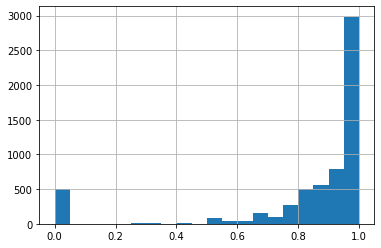

In [ ]:
overlap=[]
for user in ratings.UserID.unique():
    recommendations = model.topN(user=user, n=100)
    user_movies = ratings.loc[(ratings.UserID==user)].MovieID
    valid_rec = set(recommendations).intersection(set(user_movies)) # I can only measure by what was in the training data
    relevant_items = ratings.loc[(ratings.UserID==user) & (ratings.Rating>=4)].MovieID
    try:
        _ = len(set(recommendations).intersection(set(relevant_items))) / len(valid_rec)
    except:
        _ = 0
    overlap.append(_)

overlap = np.array(overlap)
print('avg:', overlap.mean())
pd.Series(overlap).hist(bins=20)

In [ ]:
model2 = CMF(method="als", k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model2.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


avg: 0.8077834965292413


<Axes: >

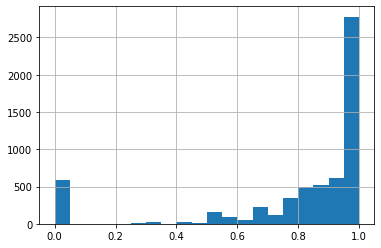

In [ ]:
overlap=[]
for user in ratings.UserID.unique():
    recommendations = model2.topN(user=user, n=100)
    user_movies = ratings.loc[(ratings.UserID==user)].MovieID
    valid_rec = set(recommendations).intersection(set(user_movies)) # I can only measure by what was in the training data
    relevant_items = ratings.loc[(ratings.UserID==user) & (ratings.Rating>=4)].MovieID
    try:
        _ = len(set(recommendations).intersection(set(relevant_items))) / len(valid_rec)
    except:
        _ = 0
    overlap.append(_)

overlap = np.array(overlap)
print('avg:', overlap.mean())
pd.Series(overlap).hist(bins=20)

**USING SURPRISE**

In [ ]:
!pip install surprise
from surprise import SVD, accuracy
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.model_selection.split import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3193642 sha256=c3579d6e881f27763aa0b6123bdc577892d110eb5089901a262399b19bedcb2b
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
table5 = major_df[["UserID","MovieID","Rating_x"]].copy().drop_duplicates()
# preprocessing the data
reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(table5[['UserID','MovieID','Rating_x']], reader)
train, test = train_test_split(data, test_size=.2, random_state=42)
# initial model
algo = SVD(random_state = 42)
algo.fit(train)
pred = algo.test(test)
# evaluate the rmse result of the prediction and ground thuth
accuracy.rmse(pred)

RMSE: 0.8732


0.8732157099506848